# Heart Disease Prediction

## Disclaimer

AI (ChatGPT) was user to help write this project, for both code and documentation. Any code generated has been studied, and any documentation has been verified.

## Dataset

"This dataset contains 1,888 records merged from five publicly available heart disease datasets. It includes 14 features that are crucial for predicting heart attack and stroke risks, covering both medical and demographic factors. Below is a detailed description of each feature." Source: Kaggle.

Dataset Source: https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset?resource=download&select=raw_merged_heart_dataset.csv  
The dataset is taken from Kaggle, but luckily there was a raw, uncleaned version of the dataset available. This is the dataset that is being used in this project. The dataset contains numerous columns, fourteen to be exact. They are as follows:

- **age**: Age of the patient (Numeric).
- **sex**: Gender of the patient. Values: 
  - 1 = male
  - 0 = female
- **cp**: Chest pain type. Values:
  - 0 = Typical angina
  - 1 = Atypical angina
  - 2 = Non-anginal pain
  - 3 = Asymptomatic
- **trestbps**: Resting Blood Pressure (in mm Hg) (Numeric).
- **chol**: Serum Cholesterol level (in mg/dl) (Numeric).
- **fbs**: Fasting blood sugar > 120 mg/dl. Values:
  - 1 = true
  - 0 = false
- **restecg**: Resting electrocardiographic results. Values:
  - 0 = Normal
  - 1 = ST-T wave abnormality
  - 2 = Left ventricular hypertrophy
- **thalach**: Maximum heart rate achieved (Numeric).
- **exang**: Exercise-induced angina. Values:
  - 1 = yes
  - 0 = no
- **oldpeak**: ST depression induced by exercise relative to rest (Numeric).
- **slope**: Slope of the peak exercise ST segment. Values:
  - 0 = Upsloping
  - 1 = Flat
  - 2 = Downsloping
- **ca**: Number of major vessels (0-3) colored by fluoroscopy. Values:
  - 0, 1, 2, 3
- **thal**: Thalassemia types. Values:
  - 1 = Normal
  - 2 = Fixed defect
  - 3 = Reversible defect
- **target**: Outcome variable (heart attack risk). Values:
  - 1 = more chance of heart attack
  - 0 = less chance of heart attack


Here are some definitions to help understand the dataset:

- **Angina**: Chest pain or discomfort due to reduced blood flow to the heart muscle.

- **Electrocardiographic**: Related to electrocardiography, a test that records the electrical activity of the heart.

- **Thalassemia**: A group of inherited blood disorders characterized by abnormal hemoglobin production, leading to anemia.

- **Fluoroscopy**: A medical imaging technique that provides real-time X-ray images, often used to observe the movement of internal organs or guide procedures.

- **ST Segment**: A portion of the electrocardiogram (ECG) tracing that represents the interval between ventricular depolarization and repolarization; abnormalities can indicate heart issues.

- **Ventricular Hypertrophy**: Thickening of the walls of the heart's ventricles, which can result from high blood pressure or other heart conditions.

- **Ischemia**: A condition characterized by reduced blood flow to a part of the body, often leading to oxygen deprivation in tissues.





In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('../datasets/raw_merged_heart_dataset.csv')

# Various statistics of the dataset
description = df.describe()
shape = df.shape
columns = df.columns
null_values = df.isnull().sum()

# # Displaying the statistics
print(f'----- Description -----\n{description}\n')
print(f'----- Shape -----\n{shape}\n')
print(f'----- Columns -----\n{columns}\n')
print(f'----- Null Values -----\n{null_values}\n')


----- Description -----
               age          sex           cp      oldpeak       target
count  2181.000000  2181.000000  2181.000000  2181.000000  2181.000000
mean     53.477762     0.693260     1.507565     0.990509     0.496103
std       9.194787     0.461246     1.371587     1.141851     0.500099
min      28.000000     0.000000     0.000000     0.000000     0.000000
25%      46.000000     0.000000     0.000000     0.000000     0.000000
50%      54.000000     1.000000     2.000000     0.600000     0.000000
75%      60.000000     1.000000     2.000000     1.600000     1.000000
max      77.000000     1.000000     4.000000     6.200000     1.000000

----- Shape -----
(2181, 14)

----- Columns -----
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

----- Null Values -----
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
tha

## Data Cleaning
 
In order to make sure the model is accurate we have to work with clean data. This includes, but is not limited to:

1. Removing NaN, null or empty rows
2. Removing outliers using Z-score

In [2]:
rows_before = df.shape[0]
# Removing the rows with missing values
df = df.dropna()

# Removing rows where any column has a '?' value instead of a number
df = df[(df != '?').all(axis=1)]

rows_after = df.shape[0]
rows_dropped = rows_before - rows_after
print(f'Number of rows dropped: {rows_dropped}')

Number of rows dropped: 293


## Finding Outliers

Next I want to see if there is any major outliers in the dataset. This can be done by calculating the Z-score for each element, and if it is beyond a certain threshold it should be removed. The Z-score tells us the element's deviation from the mean.

In [3]:
from scipy.stats import zscore

# Calculate Z-scores for each numeric column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_cols].apply(zscore)

# Filter the dataframe to remove rows where any Z-score is beyond |3|
filtered_df = df[(z_scores.abs() <= 3).all(axis=1)]

removed_counts = df.shape[0] - filtered_df.shape[0]
print(f'Number of rows removed: {removed_counts}')

Number of rows removed: 13


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into features and target variable
X = filtered_df.drop('target', axis=1)
y = filtered_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9123091)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=798219)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)

def calculate_precision(tp, fp):
    """Calculate precision: TP / (TP + FP)"""
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def calculate_recall(tp, fn):
    """Calculate recall: TP / (TP + FN)"""
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def calculate_f1(precision, recall):
    """Calculate F1 score: 2 * (Precision * Recall) / (Precision + Recall)"""
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def calculate_specificity(tn, fp):
    """Calculate specificity: TN / (TN + FP)"""
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def calculate_accuracy(tp, tn, fp, fn):
    """Calculate accuracy: (TP + TN) / (TP + TN + FP + FN)"""
    return (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

def display_classification_metrics(cm):
    """Calculate and display all classification metrics"""
    # Extract values from confusion matrix
    tn, fp = cm[0][0], cm[0][1]
    fn, tp = cm[1][0], cm[1][1]
    
    # Calculate metrics
    precision = calculate_precision(tp, fp)
    recall = calculate_recall(tp, fn)
    f1 = calculate_f1(precision, recall)
    specificity = calculate_specificity(tn, fp)
    accuracy = calculate_accuracy(tp, tn, fp, fn)
    
    # Display results
    print("\nClassification Metrics:")
    print("-" * 30)
    print(f"Accuracy:    {accuracy:.4f}")
    print(f"Precision:   {precision:.4f}")
    print(f"Recall:      {recall:.4f}")
    print(f"F1 Score:    {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    
    # Display confusion matrix values
    print("\nConfusion Matrix Details:")
    print("-" * 30)
    print(f"True Negatives:  {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives:  {tp}")

# Calculate and display metrics using existing confusion matrix
display_classification_metrics(cm)


Classification Metrics:
------------------------------
Accuracy:    0.9413
Precision:   0.9417
Recall:      0.9510
F1 Score:    0.9463
Specificity: 0.9298

Confusion Matrix Details:
------------------------------
True Negatives:  159
False Positives: 12
False Negatives: 10
True Positives:  194


## Predictions

I have created categorical mappings to help with the output of a prediction.

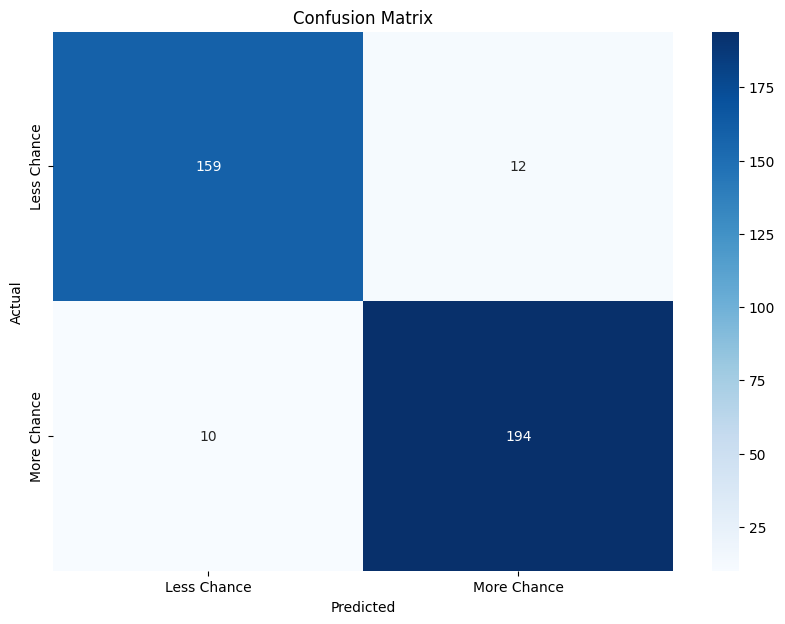

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Less Chance', 'More Chance'], yticklabels=['Less Chance', 'More Chance'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()